## Hand Written Numbers Classifier using classical Neural Networks

Another classification example to recognize hand written numbers. Trained using MNIST dataset.

After training the model, you can use Sample_Sketching sketch in Processing to write numbers and see the results here.

In [ ]:
#install a required library to use OSC protocol
!pip install https://github.com/attwad/python-osc/archive/master.zip
!pip install matplotlib

In [5]:
#setup training data. Here we using MNIST dataset for numbers
# the training set is 28x28 input, and a number 0~9 as output

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import PML

#load data
Train, Test = mnist.load_data()
samples=list(zip(Train[0],Train[1]))
sample_test=list(zip(Test[0],Test[1]))

#Split to input X and labels Y
X=np.array([i[0] for i in samples])
Y=np.array([i[1] for i in samples])
 
#Prepared to neural network samples (1D samples)
X_conv=PML.flatten_samples(X)
#normalize values
x_train,normalizer=PML.normalize_mean_std(X_conv)
nb_classes=10

#convert numbers output to one-hot encoding
y_train = utils.to_categorical(Train[1], nb_classes)
y_test = utils.to_categorical(Test[1], nb_classes)

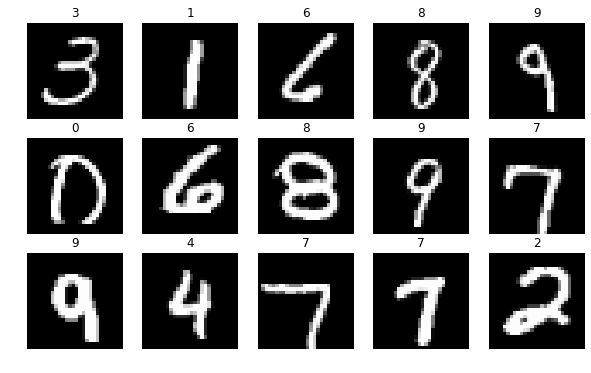

In [6]:
PML.plot_random_images(samples,labels=[0,1,2,3,4,5,6,7,8,9],rows=3,cols=5)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.1)

print("Training using: {0} samples".format(len(X_train)))
print("Validating using: {0} samples".format(len(X_test)))

Training using: 54000 samples
Validating using: 6000 samples


In [49]:

from tensorflow.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/MNIST_{}".format(time()))

TrainModel=True #Set to False to load pretrained model


model=PML.create_classify_model(28*28,nb_classes,32,[64],dropout=0)
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128, callbacks=[tensorboard])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.3920 - acc: 0.8803 - val_loss: 0.2164 - val_acc: 0.9338
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.1672 - acc: 0.9509 - val_loss: 0.1582 - val_acc: 0.9503
Epoch 3/10
54000/54000 [==============================] - 1s 19us/step - loss: 

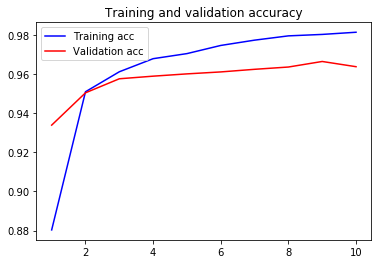

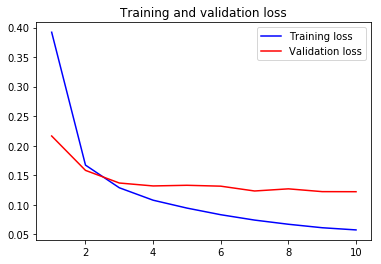

In [50]:
PML.plot_acc_loss(history)

In [51]:
_=PML.test_samples(model,samples=sample_test,labels=[0,1,2,3,4,5,6,7,8,9],normalizer=normalizer,flatten=True)

Accuracy for [0] is 99%
Accuracy for [1] is 99%
Accuracy for [2] is 97%
Accuracy for [3] is 98%
Accuracy for [4] is 97%
Accuracy for [5] is 96%
Accuracy for [6] is 99%
Accuracy for [7] is 94%
Accuracy for [8] is 96%
Accuracy for [9] is 96%


In [46]:
#setup OSC Protocol to communicate with Processing
import OSCHelper
server=OSCHelper.createServer(9000)

[0]:0%
[1]:0%
[2]:2%
[3]:0%
[4]:0%
[5]:0%
[6]:0%
[7]:95%
[8]:0%
[9]:0%


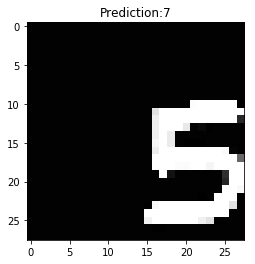

[0]:1%
[1]:1%
[2]:54%
[3]:33%
[4]:0%
[5]:0%
[6]:0%
[7]:5%
[8]:1%
[9]:0%


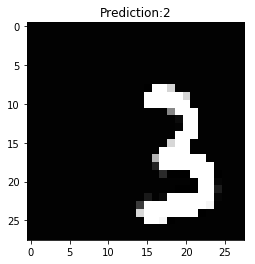

In [47]:
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


def onOSC_Image(*args):
    width=args[1]
    height=args[2]
    jpgdata=args[3]
    file_jpgdata = io.BytesIO(jpgdata)
    img = Image.open(file_jpgdata).resize((28,28)).convert("L")
    img=255.0-np.array(img).astype(float)
    x=PML.flatten_samples([normalizer.Normalize(img)])[0]
    plt.imshow(np.resize(x,(28,28)),cmap='gray')
    res=model.predict(np.array([x]))[0]
    for i,p in enumerate(res):
        print("[{0}]:{1}%".format(i,int(p*100)))
    plt.title("Prediction:{0}".format(np.argmax(res)))
    plt.show()

server.addMsgHandler( "/inputs/image", onOSC_Image )

OSCHelper.start_server(server)


In [48]:
server.close()
